In [20]:
from sklearn import metrics
import os
%matplotlib inline
import glob
import datetime
import cv2
import random
import numpy as np
import json
import re
from matplotlib import pyplot as plt
import json
import argparse
from matplotlib.patches import Rectangle
import pandas as pd
from natsort import natsorted
from scipy.stats import wasserstein_distance, norm
from scipy.linalg import sqrtm

In [2]:
RAW_CAM1_DIRECTORY = ''
RAW_CAM2_DIRECTORY = ''
TEST_CAM1_DIRECTORY = ''
TEST_CAM2_DIRECTORY = ''

raw_cam1 = natsorted(os.listdir(RAW_CAM1_DIRECTORY))
raw_cam2 = natsorted(os.listdir(RAW_CAM2_DIRECTORY))
test_cam1 = natsorted(os.listdir(TEST_CAM1_DIRECTORY))
test_cam2 = natsorted(os.listdir(TEST_CAM2_DIRECTORY))

raw_cam1 = raw_cam1[:-600]
raw_cam2 = raw_cam2[:-600]
test_cam1 = test_cam1[:-1800]
test_cam2 = test_cam2[:-1800]

print(len(raw_cam1), len(raw_cam1)*3 , len(test_cam1))

6603 19809 22641


In [3]:
raw_name_list1 = []
raw_name_list2 = []
test_name_list1 = []
test_name_list2 = []

for n in raw_cam1:
    raw_name1 = str(n)
    num = int(raw_name1[13:-4]) - 145
    raw_name1 = raw_name1[:13] + str(num) + '.txt'
    raw_name_list1.append(raw_name1)

for n in raw_cam2:
    raw_name2 = str(n)
    num = int(raw_name2[13:-4]) - 102
    raw_name2 = raw_name2[:13] + str(num) + '.txt'
    raw_name_list2.append(raw_name2)

for n in test_cam1:
    test_name1 = str(n)
    num = int(test_name1[38:-4]) - 525
    test_name1 = test_name1[:38] + str(num) + '.txt'
    test_name_list1.append(test_name1)

for n in test_cam2:
    test_name2 = str(n)
    num = int(test_name2[38:-4]) - 502
    test_name2 = test_name2[:38] + str(num) + '.txt'
    test_name_list2.append(test_name2)

In [4]:
string_list = []
for txt in raw_cam1:
    with open(RAW_CAM1_DIRECTORY+txt, "r") as file:
        strings = file.read()
    
    strings = strings[:-1].split(sep='\n')

    j = 0
    for j in range(len(strings)):
        str_list = strings[j]
        string_list.append(str_list.split())
        j += 1

raw_cam1_df = pd.DataFrame(string_list,columns=['name','x_center','y_center','width','height'])

In [5]:
string_list = []
for txt in raw_cam2:
    with open(RAW_CAM2_DIRECTORY+txt, "r") as file:
        strings = file.read()
    
    strings = strings[:-1].split(sep='\n')

    j = 0
    for j in range(len(strings)):
        str_list = strings[j]
        string_list.append(str_list.split())
        j += 1

raw_cam2_df = pd.DataFrame(string_list,columns=['name','x_center','y_center','width','height'])

In [6]:
string_list = []
i = 0
for txt in test_cam1:
    if i % 3 == 0:
        with open(TEST_CAM1_DIRECTORY+txt, "r") as file:
            strings = file.read()
        
        strings = strings[:-1].split(sep='\n')

        j = 0
        for j in range(len(strings)):
            str_list = strings[j]
            string_list.append(str_list.split())
            j += 1
    i+=1
test_cam1_df = pd.DataFrame(string_list,columns=['name','x_center','y_center','width','height'])

In [7]:
string_list = []
for txt in test_cam2:
    if i % 3 ==0:
        with open(TEST_CAM2_DIRECTORY+txt, "r") as file:
            strings = file.read()
        
        strings = strings[:-1].split(sep='\n')

        j = 0
        for j in range(len(strings)):
            str_list = strings[j]
            string_list.append(str_list.split())
            j += 1
    i+=1
test_cam2_df = pd.DataFrame(string_list,columns=['name','x_center','y_center','width','height'])

In [8]:
df1 = raw_cam1_df[raw_cam1_df['name'] == '4'].reset_index(drop=True)
df2 = raw_cam2_df[raw_cam2_df['name'] == '4'].reset_index(drop=True)
df3 = test_cam1_df[test_cam1_df['name'] == '4'].reset_index(drop=True)
df4 = test_cam2_df[test_cam2_df['name'] == '4'].reset_index(drop=True)

In [9]:
df1['round_x'] = df1['x_center'].astype('float').round(2)
df2['round_y'] = df2['y_center'].astype('float').round(2)
df3['round_x'] = df3['x_center'].astype('float').round(2)
df4['round_y'] = df4['y_center'].astype('float').round(2)

df1['round_x'] = df1['x_center'].astype('float').round(2)
df2['round_y'] = df2['y_center'].astype('float').round(2)
df3['round_x'] = df3['x_center'].astype('float').round(2)
df4['round_y'] = df4['y_center'].astype('float').round(2)


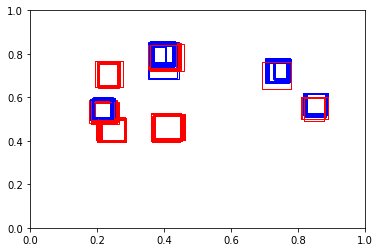

In [10]:
df = df1
fd = df3

center_xlist = []
center_ylist = []
dh, dw, _ = 700, 450 , 3

l = (df['x_center'].astype('float') - df['width'].astype('float') / 2) * dw
r = (df['x_center'].astype('float') + df['width'].astype('float') / 2) * dw
t = (df['y_center'].astype('float') + df['height'].astype('float') / 2) * dh
b = (df['y_center'].astype('float') - df['height'].astype('float') / 2) * dh

l = l.to_list()
r = r.to_list()
t = t.to_list()
b = b.to_list()
i = 0
for i in range(len(df)):
    if l[i] < 0:
        l[i] = 0
    if r[i] > dw - 1:
        r[i] = dw - 1
    if t[i] < 0:
        t[i] = 0
    if b[i] > dh - 1:
        b[i] = dh - 1
    i += 1

df_loc = pd.DataFrame({'l':l, 'r': r, 't':t, 'b':b})

df_ = df.astype('float')
left_x = np.round(df_['x_center'] - df_['width']/2,3).to_list()
right_x = np.round(df_['x_center'] + df_['width']/2,3).to_list()
left_y = np.round(df_['y_center'] - df_['height']/2,3).to_list()
right_y = np.round(df_['y_center'] + df_['height']/2,3).to_list()

fd_ = fd.astype('float')
f_left_x = np.round(fd_['x_center'] - fd_['width']/2,3).to_list()
f_right_x = np.round(fd_['x_center'] + fd_['width']/2,3).to_list()
f_left_y = np.round(fd_['y_center'] - fd_['height']/2,3).to_list()
f_right_y = np.round(fd_['y_center'] + fd_['height']/2,3).to_list()

df_['left_x'] = left_x
df_['right_x'] = right_x
df_['left_y'] = left_y
df_['right_y'] = right_y

fd_['left_x'] = f_left_x
fd_['right_x'] = f_right_x
fd_['left_y'] = f_left_y
fd_['right_y'] = f_right_y

hole1 = df_[(df_['left_x'] >= 0.18)&(df_['right_x'] <= 0.35)&(df_['left_y']>=0.6)&(df_['right_y']<=0.8)]
hole2 = df_[(df_['left_x'] >= 0.18)&(df_['right_x'] <= 0.35)&(df_['left_y']>=0.4)&(df_['right_y']<=0.6)]
hole3 = df_[(df_['left_x'] >= 0.18)&(df_['right_x'] <= 0.35)&(df_['left_y']>=0.35)&(df_['right_y']<=0.5)]
hole4 = df_[(df_['left_x'] >= 0.35)&(df_['right_x'] <= 0.5)&(df_['left_y']>=0.35)&(df_['right_y']<=0.6)]
hole5 = df_[(df_['left_x'] >= 0.8)&(df_['right_x'] <= 1.0)&(df_['left_y']>=0.4)&(df_['right_y']<=0.6)]
hole6 = df_[(df_['left_x'] >= 0.6)&(df_['right_x'] <= 0.8)&(df_['left_y']>=0.55)&(df_['right_y']<=0.8)]
hole7 = df_[(df_['left_x'] >= 0.35)&(df_['right_x'] <= 0.5)&(df_['left_y']>=0.65)&(df_['right_y']<=1.0)]
hole_list = [hole1,hole2,hole3,hole4,hole5,hole6,hole7]

t_hole1 = fd_[(fd_['left_x'] >= 0.10)&(fd_['right_x'] <= 0.4)&(fd_['left_y']>=0.6)&(fd_['right_y']<=0.8)]
t_hole2 = fd_[(fd_['left_x'] >= 0.10)&(fd_['right_x'] <= 0.4)&(fd_['left_y']>=0.43)&(fd_['right_y']<=0.8)]
t_hole3 = fd_[(fd_['left_x'] >= 0.18)&(fd_['right_x'] <= 0.35)&(fd_['left_y']>=0.35)&(fd_['right_y']<=0.5)]
t_hole4 = fd_[(fd_['left_x'] >= 0.35)&(fd_['right_x'] <= 0.5)&(fd_['left_y']>=0.35)&(fd_['right_y']<=0.6)]
t_hole5 = fd_[(fd_['left_x'] >= 0.8)&(fd_['right_x'] <= 1.0)&(fd_['left_y']>=0.4)&(fd_['right_y']<=0.8)]
t_hole6 = fd_[(fd_['left_x'] >= 0.6)&(fd_['right_x'] <= 0.8)&(fd_['left_y']>=0.55)&(fd_['right_y']<=0.8)]
t_hole7 = fd_[(fd_['left_x'] >= 0.3)&(fd_['right_x'] <= 0.6)&(fd_['left_y']>=0.6)&(fd_['right_y']<=1.0)]
t_hole_list = [t_hole1,t_hole2,t_hole3,t_hole4,t_hole5,t_hole6,t_hole7]

list1 = df['x_center'].astype('float').to_list()
list2 = df['y_center'].astype('float').to_list()
list3 = df['width'].astype('float').to_list()
list4 = df['height'].astype('float').to_list()

list_1 = df3['x_center'].astype('float').to_list()
list_2 = df3['y_center'].astype('float').to_list()
list_3 = df3['width'].astype('float').to_list()
list_4 = df3['height'].astype('float').to_list()

for i in range(len(df3)):
    rect1 = Rectangle(((np.round(list1[i],3) - (np.round(list3[i],3) / 2)), (np.round(list2[i],3) - (np.round(list4[i],3) / 2))), np.round(list3[i],3), np.round(list4[i],3), linewidth=1, edgecolor='r', facecolor='none')
    plt.gca().add_patch(rect1)
    rect2 = Rectangle(((np.round(list_1[i],3) - (np.round(list_3[i],3) / 2)), (np.round(list_2[i],3) - (np.round(list_4[i],3) / 2))), np.round(list_3[i],3), np.round(list_4[i],3), linewidth=1, edgecolor='b', facecolor='none')
    plt.gca().add_patch(rect2)

avg_x_list = []
avg_y_list = []
avg_width_list = []
avg_height_list = []

for hole in hole_list:
    new_x_center = np.average(hole['x_center'])
    new_y_center = np.average(hole['y_center'])
    new_width = np.average(hole['width'])
    new_height =np.average(hole['height'])
    rect3 = Rectangle((new_x_center  - new_width/2 , new_y_center - new_height/2), new_width, new_height, linewidth=3, edgecolor='g', facecolor='none')
    avg_x_list.append(new_x_center)
    avg_y_list.append(new_y_center)
    avg_width_list.append(new_width)
    avg_height_list.append(new_height)
    #plt.gca().add_patch(rect3)
    
plt.show()

In [11]:
avg_df = pd.DataFrame(columns=['x_center','y_center','width','height'])
avg_df['x_center'] = avg_x_list
avg_df['y_center'] = avg_y_list
avg_df['width'] = avg_width_list
avg_df['height'] = avg_height_list

dh, dw, _ = 700, 450, 3

l = (avg_df['x_center'].astype('float') - avg_df['width'].astype('float') / 2) * dw
r = (avg_df['x_center'].astype('float') + avg_df['width'].astype('float') / 2) * dw
t = (avg_df['y_center'].astype('float') + avg_df['height'].astype('float') / 2) * dh
b = (avg_df['y_center'].astype('float') - avg_df['height'].astype('float') / 2) * dh

l = l.to_list()
r = r.to_list()
t = t.to_list()
b = b.to_list()
k = 0
for k in range(len(avg_df)):
    if l[k] < 0:
        l[k] = 0
    if r[k] > dw - 1:
        r[k] = dw - 1
    if t[k] < 0:
        t[k] = 0
    if b[k] > dh - 1:
        b[k] = dh - 1
    k += 1

avg_df = pd.DataFrame({'l':l, 'r': r, 't':t, 'b':b})

In [33]:
hole2
l = (hole2['x_center'].astype('float') - hole2['width'].astype('float') / 2)* dw
r = (hole2['x_center'].astype('float') + hole2['width'].astype('float') / 2)* dw
t = (hole2['y_center'].astype('float') + hole2['height'].astype('float') / 2)* dh
b = (hole2['y_center'].astype('float') - hole2['height'].astype('float') / 2)* dh

l = l.to_list()
r = r.to_list()
t = t.to_list()
b = b.to_list()

k = 0
for k in range(len(hole2)):
    if l[k] < 0:
        l[k] = 0
    if r[k] > dw - 1:
        r[k] = dw - 1
    if t[k] < 0:
        t[k] = 0
    if b[k] > dh - 1:
        b[k] = dh - 1
    k += 1

hole_df = pd.DataFrame({'l':l, 'r': r, 't':t, 'b':b})

rect1 = avg_df
rect2 = hole_df

area_result = []
for i in range(len(rect1)):
    l_1 = rect1.loc[i][0]
    r_1 = rect1.loc[i][1]
    t_1 = rect1.loc[i][2]
    b_1 = rect1.loc[i][3]
    
    result_area_list = []
    

    j = 0
    for j in range(len(rect2)):        
        l_2 = rect2.loc[j][0]
        r_2 = rect2.loc[j][1]
        t_2 = rect2.loc[j][2]
        b_2 = rect2.loc[j][3]

        mu1 = np.array([(l_1 + r_1)/2, (b_1 + t_1)/2])
        sigma1 = np.array([[(r_1 - l_1)**2/4,0], [0,(t_1 - b_1)**2/4]])
        mu2 = np.array([(l_2 + r_2)/2, (b_2 + t_2)/2])
        sigma2 = np.array([[(r_2 - l_2)**2/4,0], [0,(t_2 - b_2)**2/4]])
        for k in range(2):
            cov_mean = sqrtm(np.dot(np.dot(sigma1, sigma2), sigma1))
            ngwd = np.abs(np.abs(mu1 - mu2) + np.trace(sigma1 + sigma2 - 2 * cov_mean))
            width = np.average(np.abs(avg_df['r'] - avg_df['l']))
            height = np.average(np.abs(avg_df['t'] - avg_df['b']))
            hyperparameter = width*height
            result = np.exp(-np.sqrt(ngwd)/hyperparameter)
        result_area_list.append(result)

    area_result.append(result_area_list)
hole_df.to_csv('annotated_7.csv')

In [53]:
h2 = area_result[1]
print(len(h2))
tp = []

for i in range(len(h2)):
    if (h2[i][0] >= 0.5) | (h2[i][1] >= 0.5):
        tp.append(h2[i])

print(len(tp), len(h2)-len(tp))

4540
4540 0


In [40]:
total = 1578 + 1874 + 52 + 4289 + 79 + 297 + 336
tp_total = 1232 + 1874 + 52 + 4289 + 74 + 290 +335
fp_total = 346 + 5 + 7 + 1

100 -fp_total/tp_total

99.9559292904493

/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


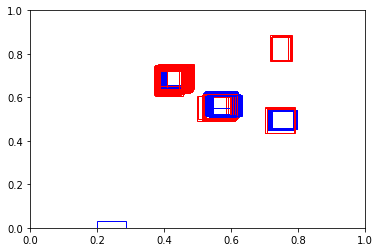

In [66]:
df = df2
fd = df4

dh, dw, _ = 700, 450 , 3

l = (df['x_center'].astype('float') - df['width'].astype('float') / 2) * dw
r = (df['x_center'].astype('float') + df['width'].astype('float') / 2) * dw
t = (df['y_center'].astype('float') + df['height'].astype('float') / 2) * dh
b = (df['y_center'].astype('float') - df['height'].astype('float') / 2) * dh

l = l.to_list()
r = r.to_list()
t = t.to_list()
b = b.to_list()
i = 0
for i in range(len(df)):
    if l[i] < 0:
        l[i] = 0
    if r[i] > dw - 1:
        r[i] = dw - 1
    if t[i] < 0:
        t[i] = 0
    if b[i] > dh - 1:
        b[i] = dh - 1
    i += 1

df_loc = pd.DataFrame({'l':l, 'r': r, 't':t, 'b':b})


df_ = df.astype('float')
left_x = np.round(df_['x_center'] - df_['width']/2,3).to_list()
right_x = np.round(df_['x_center'] + df_['width']/2,3).to_list()
left_y = np.round(df_['y_center'] - df_['height']/2,3).to_list()
right_y = np.round(df_['y_center'] + df_['height']/2,3).to_list()

fd_ = fd.astype('float')
f_left_x = np.round(fd_['x_center'] - fd_['width']/2,3).to_list()
f_right_x = np.round(fd_['x_center'] + fd_['width']/2,3).to_list()
f_left_y = np.round(fd_['y_center'] - fd_['height']/2,3).to_list()
f_right_y = np.round(fd_['y_center'] + fd_['height']/2,3).to_list()

df_['left_x'] = left_x
df_['right_x'] = right_x
df_['left_y'] = left_y
df_['right_y'] = right_y

fd_['left_x'] = f_left_x
fd_['right_x'] = f_right_x
fd_['left_y'] = f_left_y
fd_['right_y'] = f_right_y

hole1 = df_[(df_['left_x'] >= 0.35)&(df_['right_x'] <= 0.55)&(df_['left_y']>=0.5)&(df_['right_y']<=0.8)]
hole2 = df_[(df_['left_x'] >= 0.45)&(df_['right_x'] <= 0.65)&(df_['left_y']>=0.4)&(df_['right_y']<=0.65)]
hole3 = df_[(df_['left_x'] >= 0.45)&(df_['right_x'] <= 0.65)&(df_['left_y']>=0.6)&(df_['right_y']<=1)]
hole4 = df_[(df_['left_x'] >= 0.65)&(df_['right_x'] <= 0.80)&(df_['left_y']>=0.35)&(df_['right_y']<=0.60)]
hole5 = df_[(df_['left_x'] >= 0.65)&(df_['right_x'] <= 0.80)&(df_['left_y']>=0.60)&(df_['right_y']<=1.0)]
hole_list = [hole1,hole2,hole3,hole4,hole5]

t_hole1 = fd_[(fd_['left_x'] >= 0.35)&(fd_['right_x'] <= 0.55)&(fd_['left_y']>=0.5)&(fd_['right_y']<=0.8)]
t_hole2 = fd_[(fd_['left_x'] >= 0.45)&(fd_['right_x'] <= 0.65)&(fd_['left_y']>=0.4)&(fd_['right_y']<=0.65)]
t_hole3 = fd_[(fd_['left_x'] >= 0.45)&(fd_['right_x'] <= 0.65)&(fd_['left_y']>=0.6)&(fd_['right_y']<=1)]
t_hole4 = df_[(df_['left_x'] >= 0.65)&(df_['right_x'] <= 0.80)&(df_['left_y']>=0.35)&(df_['right_y']<=0.60)]
t_hole5 = df_[(df_['left_x'] >= 0.65)&(df_['right_x'] <= 0.80)&(df_['left_y']>=0.60)&(df_['right_y']<=1.0)]
t_hole_list = [t_hole1,t_hole2,t_hole3,t_hole4,t_hole5]

list1 = df2['x_center'].astype('float').to_list()
list2 = df2['y_center'].astype('float').to_list()
list3 = df2['width'].astype('float').to_list()
list4 = df2['height'].astype('float').to_list()

list_1 = df4['x_center'].astype('float').to_list()
list_2 = df4['y_center'].astype('float').to_list()
list_3 = df4['width'].astype('float').to_list()
list_4 = df4['height'].astype('float').to_list()

for i in range(len(df4)):
    rect1 = Rectangle(((np.round(list1[i],3) - (np.round(list3[i],3) / 2)), (np.round(list2[i],3) - (np.round(list4[i],3) / 2))), np.round(list3[i],3), np.round(list4[i],3), linewidth=1, edgecolor='r', facecolor='none')
    plt.gca().add_patch(rect1)
    rect2 = Rectangle(((np.round(list_1[i],3) - (np.round(list_3[i],3) / 2)), (np.round(list_2[i],3) - (np.round(list_4[i],3) / 2))), np.round(list_3[i],3), np.round(list_4[i],3), linewidth=1, edgecolor='b', facecolor='none')
    plt.gca().add_patch(rect2)

avg_x_list = []
avg_y_list = []
avg_width_list = []
avg_height_list = []

for hole in hole_list:
    new_x_center = np.average(hole['x_center'])
    new_y_center = np.average(hole['y_center'])
    new_width = np.average(hole['width'])
    new_height =np.average(hole['height'])
    rect3 = Rectangle((new_x_center  - new_width/2 , new_y_center - new_height/2), new_width, new_height, linewidth=3, edgecolor='g', facecolor='none')
    avg_x_list.append(new_x_center)
    avg_y_list.append(new_y_center)
    avg_width_list.append(new_width)
    avg_height_list.append(new_height)
    #plt.gca().add_patch(rect3)
plt.show()


In [69]:
avg_df = pd.DataFrame(columns=['x_center','y_center','width','height'])
avg_df['x_center'] = avg_x_list
avg_df['y_center'] = avg_y_list
avg_df['width'] = avg_width_list
avg_df['height'] = avg_height_list

dh, dw, _ = 700, 450, 3

l = (avg_df['x_center'].astype('float') - avg_df['width'].astype('float') / 2) * dw
r = (avg_df['x_center'].astype('float') + avg_df['width'].astype('float') / 2) * dw
t = (avg_df['y_center'].astype('float') + avg_df['height'].astype('float') / 2) * dh
b = (avg_df['y_center'].astype('float') - avg_df['height'].astype('float') / 2) * dh

l = l.to_list()
r = r.to_list()
t = t.to_list()
b = b.to_list()
k = 0
for k in range(len(avg_df)):
    if l[k] < 0:
        l[k] = 0
    if r[k] > dw - 1:
        r[k] = dw - 1
    if t[k] < 0:
        t[k] = 0
    if b[k] > dh - 1:
        b[k] = dh - 1
    k += 1

avg_df = pd.DataFrame({'l':l, 'r': r, 't':t, 'b':b}).dropna()
avg_df

,l,r,t,b
0,170.883320,209.477805,511.087411,440.162265
1,233.890764,276.310337,430.162076,351.953747
3,318.251147,354.927179,382.016639,305.466128
4,322.912787,351.441017,613.295164,540.503115


In [76]:
hole1
l = (hole1['x_center'].astype('float') - hole1['width'].astype('float') / 2)* dw
r = (hole1['x_center'].astype('float') + hole1['width'].astype('float') / 2)* dw
t = (hole1['y_center'].astype('float') + hole1['height'].astype('float') / 2)* dh
b = (hole1['y_center'].astype('float') - hole1['height'].astype('float') / 2)* dh

l = l.to_list()
r = r.to_list()
t = t.to_list()
b = b.to_list()

k = 0
for k in range(len(hole1)):
    if l[k] < 0:
        l[k] = 0
    if r[k] > dw - 1:
        r[k] = dw - 1
    if t[k] < 0:
        t[k] = 0
    if b[k] > dh - 1:
        b[k] = dh - 1
    k += 1

hole_df = pd.DataFrame({'l':l, 'r': r, 't':t, 'b':b})

rect1 = avg_df
rect2 = hole_df

area_result = []
for i in range(len(rect1)):
    l_1 = rect1.iloc[i][0]
    r_1 = rect1.iloc[i][1]
    t_1 = rect1.iloc[i][2]
    b_1 = rect1.iloc[i][3]
    
    result_area_list = []
    

    j = 0
    for j in range(len(rect2)):        
        l_2 = rect2.iloc[j][0]
        r_2 = rect2.iloc[j][1]
        t_2 = rect2.iloc[j][2]
        b_2 = rect2.iloc[j][3]

        mu1 = np.array([(l_1 + r_1)/2, (b_1 + t_1)/2])
        sigma1 = np.array([[(r_1 - l_1)**2/4,0], [0,(t_1 - b_1)**2/4]])
        mu2 = np.array([(l_2 + r_2)/2, (b_2 + t_2)/2])
        sigma2 = np.array([[(r_2 - l_2)**2/4,0], [0,(t_2 - b_2)**2/4]])
        for k in range(2):
            cov_mean = sqrtm(np.dot(np.dot(sigma1, sigma2), sigma1))
            ngwd = np.abs(np.abs(mu1 - mu2) + np.trace(sigma1 + sigma2 - 2 * cov_mean))
            width = np.average(np.abs(avg_df['r'] - avg_df['l']))
            height = np.average(np.abs(avg_df['t'] - avg_df['b']))
            hyperparameter = width*height
            result = np.exp(-np.sqrt(ngwd)/hyperparameter)
        result_area_list.append(result)

    area_result.append(result_area_list)
hole_df.to_csv('annotated_7.csv')

In [77]:
h1 = area_result[0]
print(len(h1))
tp = []

for i in range(len(h1)):
    if (h1[i][0] >= 0.5) | (h1[i][1] >= 0.5):
        tp.append(h1[i])

print(len(tp), len(h1)-len(tp))

4252
4252 0


In [ ]:
total = 1578 + 1874 + 52 + 4289 + 79 + 297 + 336
tp_total = 1232 + 1874 + 52 + 4289 + 74 + 290 +335
fp_total = 346 + 5 + 7 + 1

100 -fp_total/tp_total

99.9559292904493

In [54]:
center_xlist = []
center_ylist = []
dh, dw, _ = 1080, 1920 , 3

df = df4

l = (df['x_center'].astype('float') - df['width'].astype('float') / 2) * dw
r = (df['x_center'].astype('float') + df['width'].astype('float') / 2) * dw
t = (df['y_center'].astype('float') + df['height'].astype('float') / 2) * dh
b = (df['y_center'].astype('float') - df['height'].astype('float') / 2) * dh

l = l.to_list()
r = r.to_list()
t = t.to_list()
b = b.to_list()
i = 0
for i in range(len(df)):
    if l[i] < 0:
        l[i] = 0
    if r[i] > dw - 1:
        r[i] = dw - 1
    if t[i] < 0:
        t[i] = 0
    if b[i] > dh - 1:
        b[i] = dh - 1
    i += 1

df4_loc = pd.DataFrame({'l':l, 'r': r, 't':t, 'b':b})

In [ ]:
rect1 = df2_loc
rect2 = df4_loc

result_area_list = []


for i in range(len(rect1)):
    l_1 = rect1.loc[i][0]
    r_1 = rect1.loc[i][1]
    t_1 = rect1.loc[i][2]
    b_1 = rect1.loc[i][3]
    
    l_2 = rect2.loc[i][0]
    r_2 = rect2.loc[i][1]
    t_2 = rect2.loc[i][2]
    b_2 = rect2.loc[i][3]

    x_1 = r_1 - l_1 
    y_1 = t_1 - b_1

    x_2 = r_2 - l_2 
    y_2 = t_2 - b_2

    area_1 = abs(x_1 * y_1)
    area_2 = abs(x_2 * y_2)

    # intersection_x_length = abs(max(1_1, l_2) - max(b_1, b_2))
    # intersection_y_length = abs(min(t_1, t_2) - max(r_1, r_2))
    
    intersection_x_length = abs(min(r_1, r_2) - max(l_1, l_2))
    intersection_y_length = abs(min(t_1, t_2) - max(b_1,b_2))

    inter_area = abs(intersection_x_length * intersection_y_length)

    total_area = area_1 + area_2 - inter_area
    result = inter_area / total_area
    result_area_list.append(result)




